The k-means algorithm
---

Exercise - Chigago gambling crimes
---

The city of Chicago disposes of 8 police patrols to fight gambling crimes. They want to assign each patrol to an area of Chicago where there is historically a lot of gambling crimes.

> **Exercise**: Load the gambling crimes data. Create an `X` array with the `Longitude` and the `Latitude` variables (drop the other ones). Create a map of the gambling crimes using these two variables. Find eight centers of gamblings crimes using *k*-means. Plot each cluster with a different color and mark their centers (the centroids).

In [1]:
import pandas as pd
import os

# Load data
data_df = pd.read_csv(os.path.join('chicago-crimes.csv'))

# Print shape
print('Shape:', data_df.shape)

# First five rows
data_df.head()

Shape: (13981, 8)


,Case Number,Block,Description,Location Description,Arrest,Year,Latitude,Longitude
0,G360170,027XX N HOYNE AV,GAME/DICE,CHA HALLWAY/STAIRWELL/ELEVATOR,True,2001,41.932,-87.679
1,HV362360,105XX S LAFAYETTE AVE,GAME/DICE,SIDEWALK,True,2012,41.703,-87.625
2,HX330175,021XX E 71ST ST,GAME/DICE,GROCERY FOOD STORE,True,2014,41.766,-87.574
3,HP497478,005XX E 40TH ST,GAME/DICE,CHA PARKING LOT/GROUNDS,True,2008,41.821,-87.613
4,HJ481453,013XX E 53RD ST,GAME/DICE,STREET,True,2003,41.799,-87.593


In [2]:
import numpy as np

# Create X matrix
longitude = data_df['Longitude'].values
latitude = data_df['Latitude'].values
X = np.c_[longitude, latitude]

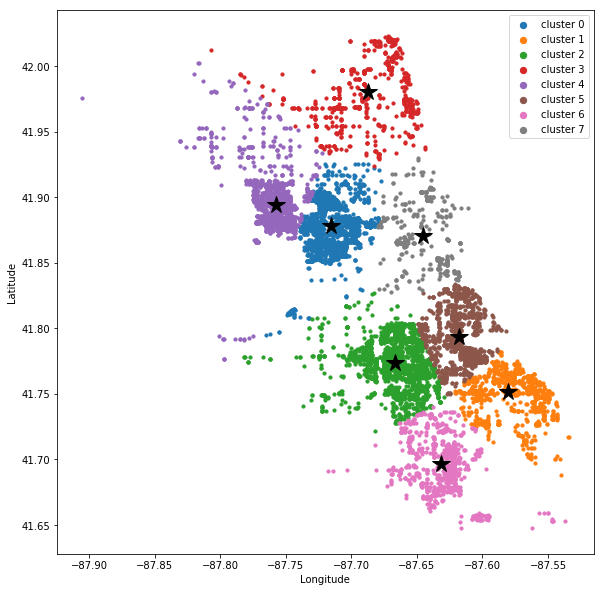

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create k-means object
kmeans = KMeans(n_clusters=8, random_state=0)

# Compute k-means
kmeans.fit(X)

# Create figure
plt.figure(figsize=(10, 10)) # figure 10 by 10 inches

# Same scale for the x- and y-axis
plt.gca().set_aspect('equal', adjustable='box')

# Plot each cluster
for cluster in range(kmeans.n_clusters):
    # Get points in this cluster
    idx = (kmeans.labels_ == cluster)
    x1, x2 = X[idx, 0], X[idx, 1]
    
    # Plot points
    plt.scatter(x1, x2, s=10, label='cluster {}'.format(cluster))
    
    # Plot centroid
    centroid = kmeans.cluster_centers_[cluster]
    plt.plot(centroid[0], centroid[1], marker='*', color='black', markersize=18)
    
# Add labels
plt.legend(markerscale=2) # larger (x2) markers 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Challenge - Image compression
---

> **Exercise**: Load the `pepper.jpg` image. Apply *k*-means to the image pixels to extract a palette of 3, 5 or 10 colors. Then re-draw the image using this new palette.

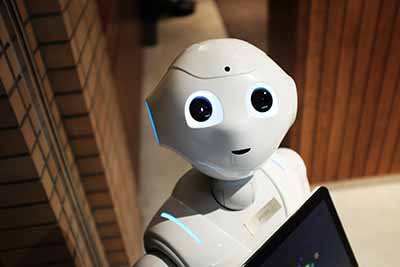

In [6]:
from PIL import Image

# Load the image using PIL
pillow_img = Image.open(os.path.join('pepper.jpg'))

# Display image
pillow_img

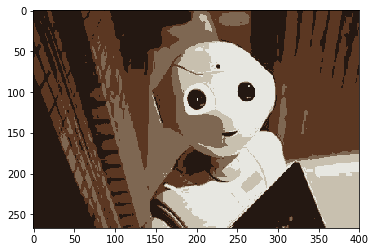

In [10]:
# Convert image into Numpy array
img = np.array(pillow_img)

# Create matrix of pixels
X = img.reshape(-1, 3) # Size (n, 3) where n is the number of pixels

# Apply k-means
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X, y=None)

# Get the array of centroids (the new color palette)
palette = kmeans.cluster_centers_

# Get labels of each pixel
labels = kmeans.labels_

# Get new colors from our color palette
new_pixels = palette[labels]

# Reshape array of pixels
new_img = new_pixels.reshape(img.shape)

# Show image
plt.imshow(new_img/255) # Imshow expects pixels between 0 and 1 when dtype is float!
plt.show()